In [143]:
import sys
import glob
if '../' not in sys.path:
    sys.path.append('../')

import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
pwd

'/Users/hiroyukiinoue/Codes/Python/rl_learn/notebook'

In [3]:
sys.path

['',
 '/anaconda/lib/python36.zip',
 '/anaconda/lib/python3.6',
 '/anaconda/lib/python3.6/lib-dynload',
 '/anaconda/lib/python3.6/site-packages',
 '/anaconda/lib/python3.6/site-packages/aeosa',
 '/anaconda/lib/python3.6/site-packages/IPython/extensions',
 '/Users/hiroyukiinoue/.ipython',
 '../']

In [4]:
import gym
register = gym.envs.registration.register
register(id='FrozenLakeEasy-v1',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'is_slippery':False})

In [5]:
def show_q_value(Q):
    env = gym.make('FrozenLakeEasy-v1')
    state_size = 3
    nrow = env.unwrapped.nrow
    ncol = env.unwrapped.ncol
    qnrow = state_size * nrow
    qncol = state_size * ncol
    qmap = np.zeros((qnrow, qncol))
    
    for r in range(nrow):
        for c in range(ncol):
            state_exist = False
            s = ncol * r + c
            if isinstance(Q, dict) and s in Q:
                state_exist = True
            if isinstance(Q, np.ndarray) and s < Q.shape[0]:
                state_exist = True
            if isinstance(Q, collections.defaultdict) and s in Q:
                state_exist = True
#             if state_exist:
#                 rr = 1 + r * state_size
#                 cc = 1 + c * state_size
#                 qmap[rr][cc - 1] = Q[s][0]
#                 qmap[rr + 1][cc] = Q[s][1]
#                 qmap[rr][cc + 1] = Q[s][2]
#                 qmap[rr - 1][cc] = Q[s][3]
#                 qmap[rr][cc] = np.mean(Q[s])
            if state_exist:
                # At the display map, the vertical index is reversed.
                _r = 1 + (nrow - 1 - r) * state_size
                _c = 1 + c * state_size
                qmap[_r][_c - 1] = Q[s][0]  # LEFT = 0
                qmap[_r - 1][_c] = Q[s][1]  # DOWN = 1
                qmap[_r][_c + 1] = Q[s][2]  # RIGHT = 2
                qmap[_r + 1][_c] = Q[s][3]  # UP = 3
                qmap[_r][_c] = np.mean(Q[s])  # Center

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(qmap, cmap=cm.RdYlGn, interpolation="bilinear",
               vmax=abs(qmap).max(), vmin=-abs(qmap).max())
    ax.set_xlim(-0.5, qncol - 0.5)
    #ax.set_ylim(qnrow - 0.5, -0.5)
    ax.set_ylim(-0.5, qnrow - 0.5)
    ax.set_xticks(np.arange(-0.5, qncol, state_size))
    ax.set_yticks(np.arange(-0.5, qnrow, state_size))
    ax.set_xticklabels(range(ncol + 1))
    ax.set_yticklabels(range(nrow + 1))
    ax.grid(which="both")
    plt.show()

    return qmap

In [233]:
import grid.agent as ga
import importlib
importlib.reload(ga)

dict_state_reward = dict([(i, -0.001) for i in range(16)])
reward_hole = -0.5
reward_goal = 1
dict_state_reward[5] = reward_hole
dict_state_reward[7] = reward_hole
dict_state_reward[11] = reward_hole
dict_state_reward[12] = reward_hole
dict_state_reward[15] = reward_goal

Qs = []

env = gym.make('FrozenLakeEasy-v1')
env.dict_state_reward = dict_state_reward 
agent = ga.MonteCarloAgent(env)
agent.train(num_episodes=100)
Qs.append(agent.Q)



SFFF
FHFH
FFFH
HFFG
None


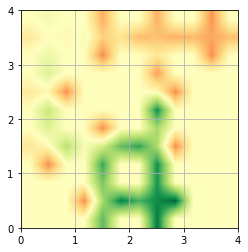

In [234]:
qq = show_q_value(agent.Q)

In [235]:
j = 0
for i, ep in enumerate(agent.log_episodes):
    if ep[-1][-2] > 0:
        #print(i, ep[-1])
        j += 1
print(j)

44


In [236]:
agent.Q

defaultdict(<function grid.agent.GymFrozenLakeEpsilonGreedyAgent.init_Q.<locals>.<lambda>>,
            {0: array([-0.13339774,  0.09905266, -0.04343573,  0.05484536]),
             1: array([ 0.03812535, -0.5       , -0.16878186, -0.3898865 ]),
             2: array([-0.34168702, -0.15357086, -0.38029687, -0.38308245]),
             3: array([-0.3552019 , -0.5       , -0.33048076, -0.476     ]),
             4: array([-0.13247691,  0.26432143, -0.5       ,  0.15895647]),
             6: array([ 4.62587482e-04,  8.26867644e-01, -5.00000000e-01, -4.42370000e-01]),
             8: array([-0.15425509, -0.5       ,  0.32976343,  0.16607055]),
             9: array([ 0.04168575,  0.71681879,  0.59644492, -0.5       ]),
             10: array([ 0.74470315,  0.83612417, -0.5       ,  0.39111774]),
             13: array([-0.5       ,  0.61539621,  0.89089813,  0.53838718]),
             14: array([0.68104682, 0.92573189, 1.        , 0.80623189])})

In [232]:
agent.epsilon

0.4523960735568548

In [222]:
agent.sa_counts

defaultdict(<function grid.agent.GymFrozenLakeEpsilonGreedyAgent.init_sa_counts.<locals>.<lambda>>,
            {0: [220, 174, 3133, 458],
             1: [158, 155, 2962, 158],
             2: [142, 2951, 146, 156],
             3: [134, 12, 18, 17],
             4: [14, 11, 22, 149],
             6: [124, 2653, 117, 143],
             8: [38, 9, 7, 8],
             9: [13, 11, 92, 7],
             10: [104, 2571, 88, 86],
             13: [7, 10, 95, 12],
             14: [103, 92, 2459, 104]})

In [223]:
rewards = [ep[-1][-2] for ep in agent.log_episodes]

In [224]:
N = 50
mn = pd.Series(rewards).rolling(window=N).mean().values
st = pd.Series(rewards).rolling(window=N).std().values

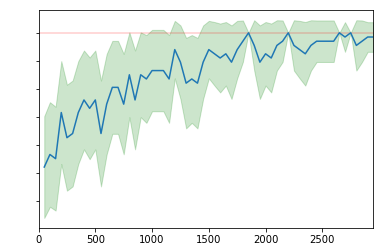

In [225]:
y = mn[::N]
x = np.arange(len(y)) * N
y1 = y - 0.5*st[::N]
y2 = y + 0.5*st[::N]

plt.plot(x, y)
plt.hlines(xmin=x[0], xmax=x[-1], y=1.0, color='red', alpha='0.2')
plt.fill_between(x, y1, y2, color='green', alpha='0.2')
plt.yticks(color=(1,1,1))
plt.xlim([x[0], x[-1]])
plt.show()

In [139]:
gamma = 0.99
Gs = []
for ep in agent.log_episodes:
    gs = [np.power(gamma, j) * exp1[3] for j, exp1 in enumerate(ep)]
    Gs.append(sum(gs)) 

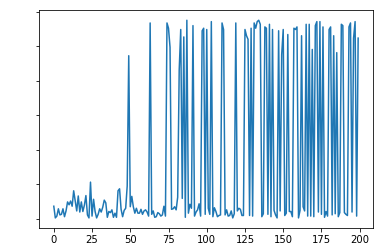

In [140]:
plt.plot(np.arange(len(Gs)), Gs)
plt.yticks(color=(1,1,1))
plt.show()